In [7]:
from networks import *
from simulation import *
from display import *
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [47]:
g = gen_BA_graph(5000, 3)
g1 = gen_ER_graph(5000, 6/(5000-1))

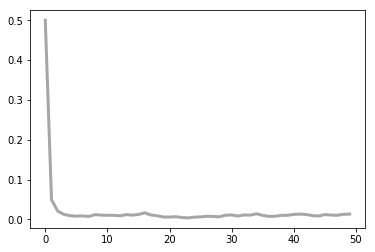

In [20]:
rhos = run_SIS_simulation(g, 0.1, time_steps=50)
plot_all_time_steps(rhos)

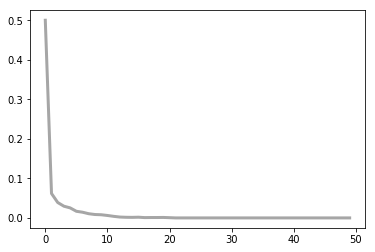

In [46]:
rhos1 = run_SIS_simulation(g1, 0.13, time_steps=50)
plot_all_time_steps(rhos1)

In [26]:
for lam in np.linspace(0, 1, 5):
    print(run_SIS_simulation(g, 0.1))

[  5.00000000e-01   5.18000000e-02   2.38000000e-02   2.70000000e-02
   2.10000000e-02   1.18000000e-02   1.06000000e-02   8.60000000e-03
   9.00000000e-03   1.22000000e-02   1.22000000e-02   7.40000000e-03
   8.00000000e-03   7.80000000e-03   6.00000000e-03   3.80000000e-03
   3.20000000e-03   2.80000000e-03   4.20000000e-03   4.20000000e-03
   2.60000000e-03   4.20000000e-03   7.80000000e-03   8.00000000e-03
   1.00000000e-02   8.20000000e-03   8.20000000e-03   1.34000000e-02
   1.36000000e-02   1.52000000e-02   1.40000000e-02   1.30000000e-02
   7.40000000e-03   8.00000000e-03   1.00000000e-02   8.40000000e-03
   8.00000000e-03   9.20000000e-03   1.40000000e-02   1.26000000e-02
   1.04000000e-02   8.60000000e-03   7.20000000e-03   3.20000000e-03
   7.80000000e-03   6.40000000e-03   8.40000000e-03   6.00000000e-03
   3.80000000e-03   4.40000000e-03   1.80000000e-03   2.40000000e-03
   1.20000000e-03   8.00000000e-04   8.00000000e-04   8.00000000e-04
   5.60000000e-03   6.20000000e-03

[  5.00000000e-01   4.92000000e-02   1.82000000e-02   1.28000000e-02
   1.16000000e-02   1.16000000e-02   5.80000000e-03   5.00000000e-03
   5.80000000e-03   5.80000000e-03   5.40000000e-03   5.80000000e-03
   5.60000000e-03   7.00000000e-03   6.40000000e-03   6.60000000e-03
   8.00000000e-03   8.20000000e-03   1.10000000e-02   1.40000000e-02
   9.60000000e-03   9.40000000e-03   8.40000000e-03   7.40000000e-03
   7.80000000e-03   5.40000000e-03   4.60000000e-03   3.80000000e-03
   2.60000000e-03   2.20000000e-03   2.60000000e-03   3.80000000e-03
   3.40000000e-03   2.20000000e-03   1.20000000e-03   4.00000000e-04
   6.00000000e-04   4.00000000e-04   4.00000000e-04   1.00000000e-03
   2.20000000e-03   3.60000000e-03   9.80000000e-03   7.60000000e-03
   8.20000000e-03   6.20000000e-03   5.40000000e-03   1.16000000e-02
   8.80000000e-03   6.80000000e-03   8.80000000e-03   1.24000000e-02
   9.20000000e-03   1.00000000e-02   1.50000000e-02   1.62000000e-02
   1.54000000e-02   1.46000000e-02

In [1]:
g = gen_BA_graph(100000, 3)
data = run_SIS_simulation(g, .05, rho_0=0.1, time_steps=50)
plot_all_time_steps(data)

NameError: name 'gen_BA_graph' is not defined

# Experiment 1

In [8]:
lambdas_plan = {
    1e5 : np.linspace(1/12, 1/8, 5),
    5e5 : np.linspace(1/15, 1/10, 3),
    1e6 : np.linspace(1/17, 1/12, 2),
    5e6 : np.linspace(1/18, 1/15, 2),
    8.5e6 : np.linspace(1/20, 1/19, 2),
#     8.5e6 : [1/20]
}

data = {}
for size in lambdas_plan.keys():
    print('starting size: ', size)
    g = gen_BA_graph(size, 3)
    for lam in lambdas_plan[size]:
        print('\tstarting lamda: ', lam)
        data[(size, lam)] = []
        for trial in range(10):
#             print('t', trial)
            data[(size, lam)].append(run_SIS_simulation(g, lam, time_steps=20)[-1])
        data[(size, lam)] = np.mean(data[(size, lam)])

starting size:  100000.0
	starting lamda:  0.0833333333333
	starting lamda:  0.09375
	starting lamda:  0.104166666667
	starting lamda:  0.114583333333
	starting lamda:  0.125
starting size:  500000.0
	starting lamda:  0.0666666666667
	starting lamda:  0.0833333333333
	starting lamda:  0.1
starting size:  1000000.0
	starting lamda:  0.0588235294118
	starting lamda:  0.0833333333333
starting size:  5000000.0
	starting lamda:  0.0555555555556
	starting lamda:  0.0666666666667
starting size:  8500000.0
	starting lamda:  0.05
	starting lamda:  0.0526315789474


In [5]:
import pickle

In [22]:
pickle.dump(data, open('big_data.pickle', 'wb'))

In [21]:
# d = pickle.load(open('big_data.pickle', 'rb'))

In [27]:
plottable_data = {}
for size, lam in data:
    plottable_data[size] = plottable_data.get(size, []) + [(1.0/lam, data[(size, lam)])]

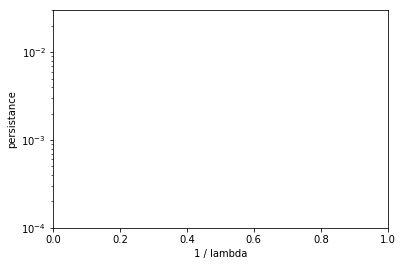

# Plot No. 1

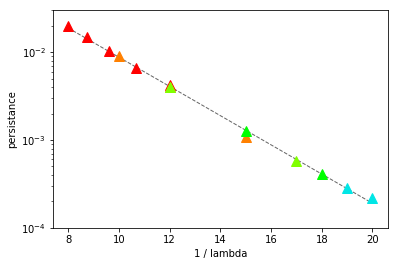

In [148]:
# plot a fit
all_xs = []
all_ys = []
for values in plottable_data.values():
    xs, ys = zip(*values)
    all_xs.extend(xs)
    all_ys.extend(ys)
    
a, c = np.polyfit(all_xs, np.log(all_ys), 1)
fit_xs = np.linspace(8, 20, 100)
fit_ys = np.exp(a * fit_xs + c)
thinkplot.plot(fit_xs, fit_ys, style='--', linewidth=1, color=(.4,.4,.4), alpha=1.0)


# plot a 
shapes = ['o', '+', 's', 'x', 'v', '.']
colors = [(1., 0., 0.), (1., .5, 0.), (.5, 1., 0.), (0., 1., 0.), (0., .9, .9)]

for size, shape, color in zip(plottable_data, shapes, colors):
    xs, ys = zip(*plottable_data[size])
    thinkplot.plot(xs, ys, style='^', color=color, markersize=10, alpha=1.0)
    

thinkplot.config(ylim=[1e-4, 3e-2], yscale='log', xlabel='1 / lambda', ylabel='persistance')

plt.savefig('takes_a_while.pdf')

# Experiment 2

In [5]:
sizes = [500000, 25000, 12500, 6250]

lam = 0.065
trials = 100000
ts = 50

In [27]:


data = {}

for size in sizes:
    print('starting size ', size)
    surviving_strains = np.zeros(ts, dtype=np.int32)  # how many trials are surviving at time t
    g = gen_BA_graph(size, 3)
    for trial in range(trials):
        if trial % 1000 == 0:
            print('starting trial ', trial)
        surviving_strains += np.array([bool(rho) for rho in run_SIS_simulation(g, lam, rho_0=None, time_steps=ts)])

    data[size] = surviving_strains

starting size  500000
starting trial  0
starting trial  1000
starting trial  2000
starting trial  3000
starting trial  4000
starting trial  5000
starting trial  6000
starting trial  7000
starting trial  8000
starting trial  9000
starting trial  10000
starting trial  11000
starting trial  12000
starting trial  13000
starting trial  14000
starting trial  15000
starting trial  16000
starting trial  17000
starting trial  18000
starting trial  19000
starting trial  20000
starting trial  21000
starting trial  22000
starting trial  23000
starting trial  24000
starting trial  25000
starting trial  26000
starting trial  27000
starting trial  28000
starting trial  29000
starting trial  30000
starting trial  31000
starting trial  32000
starting trial  33000
starting trial  34000
starting trial  35000
starting trial  36000
starting trial  37000
starting trial  38000
starting trial  39000
starting trial  40000
starting trial  41000
starting trial  42000
starting trial  43000
starting trial  44000
s

starting trial  72000
starting trial  73000
starting trial  74000
starting trial  75000
starting trial  76000
starting trial  77000
starting trial  78000
starting trial  79000
starting trial  80000
starting trial  81000
starting trial  82000
starting trial  83000
starting trial  84000
starting trial  85000
starting trial  86000
starting trial  87000
starting trial  88000
starting trial  89000
starting trial  90000
starting trial  91000
starting trial  92000
starting trial  93000
starting trial  94000
starting trial  95000
starting trial  96000
starting trial  97000
starting trial  98000
starting trial  99000


In [2]:
pickle.dump(data, open('change.pickle', 'wb'))

NameError: name 'pickle' is not defined

# Plot 2

In [6]:
data2 = pickle.load(open('survival-effing-good.pickle', 'rb'))
for size in data2:
    thinkplot.plot(range(0, ts), data2[size]/trials, style='o-', markersize=3, linewidth=1)
    
thinkplot.config(ylim=[2e-4, 2], yscale='log', xlabel='t', ylabel='surviving probability')
plt.savefig('takes_a_long_while.pdf')

NameError: name 'plt' is not defined